# Machine Learning practical task 1

## By Dinislam Gabitov, d.gabitov@innopolis.university, 19BS-DS-01

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("android_traffic.csv")
data.head(5)

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,7,6,819,968,7,1,benign


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop(['type'], axis=1)
y = data['type']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rand_forest_class = RandomForestClassifier(max_depth=15)
bagging_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
ada_boost_class = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid_rand_forest = [{'n_estimators': [30, 40, 50, 60, 70],
               'max_features': ['sqrt', 'log2'],
               'min_impurity_decrease': np.logspace(-6, -9, num=13)}]

param_grid_bagging = [{'n_estimators': [30, 40, 50, 60, 70],
               'base_estimator__max_features': ['sqrt', 'log2'],
               'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)}]

param_grid_ada_boost = [{'n_estimators': [30, 40, 50, 60, 70],
               'base_estimator__max_features': ['sqrt', 'log2'],
               'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)}]


grid_search_rand_forest = GridSearchCV(rand_forest_class, param_grid=param_grid_rand_forest, cv=7, n_jobs=-1)

grid_search_rand_forest.fit(x_train, y_train)


grid_search_bagging = GridSearchCV(bagging_class, param_grid=param_grid_bagging, cv=7, n_jobs=-1)

grid_search_bagging.fit(x_train, y_train)


grid_search_ada_boost = GridSearchCV(ada_boost_class, param_grid=param_grid_ada_boost, cv=7, n_jobs=-1)

grid_search_ada_boost.fit(x_train, y_train)

GridSearchCV(cv=7,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15)),
             n_jobs=-1,
             param_grid=[{'base_estimator__max_features': ['sqrt', 'log2'],
                          'base_estimator__min_impurity_decrease': array([1.00000000e-06, 5.62341325e-07, 3.16227766e-07, 1.77827941e-07,
       1.00000000e-07, 5.62341325e-08, 3.16227766e-08, 1.77827941e-08,
       1.00000000e-08, 5.62341325e-09, 3.16227766e-09, 1.77827941e-09,
       1.00000000e-09]),
                          'n_estimators': [30, 40, 50, 60, 70]}])

In [6]:
def print_best(model):
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    print()
    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Best score")
    print(means[np.argmax(means)])

In [7]:
print_best(grid_search_rand_forest)


Best parameters set found on development set:

{'max_features': 'log2', 'min_impurity_decrease': 1.7782794100389227e-07, 'n_estimators': 70}

Best score
0.8978669331444953


In [8]:
print_best(grid_search_bagging)


Best parameters set found on development set:

{'base_estimator__max_features': 'sqrt', 'base_estimator__min_impurity_decrease': 5.6234132519034905e-08, 'n_estimators': 40}

Best score
0.8967506839692397


In [9]:
print_best(grid_search_ada_boost)


Best parameters set found on development set:

{'base_estimator__max_features': 'log2', 'base_estimator__min_impurity_decrease': 1e-09, 'n_estimators': 30}

Best score
0.880176516676905


In [14]:
from sklearn.metrics import accuracy_score, f1_score

def print_acc(model, name):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    acc_train = accuracy_score(y_pred_train, y_train)
    acc = accuracy_score(y_pred, y_test)
    print(f"{name} test accuracy: {acc}")
    print(f"{name} training accuracy: {acc_train}")

In [15]:
print_acc(grid_search_rand_forest, "Random forest")

Random forest test accuracy: 0.8897386870618228
Random forest training accuracy: 0.9725940089228808


In [16]:
print_acc(grid_search_bagging, "Bagging")

Bagging test accuracy: 0.887189292543021
Bagging training accuracy: 0.97131931166348


In [17]:
print_acc(grid_search_ada_boost, "Ada boost")

Ada boost test accuracy: 0.8718929254302104
Ada boost training accuracy: 0.9907584448693435


### Both random forest and bagging classifier have almost equal accuracy, when the ada boost have lower. 
I think this is because random forest and bagging with tuned max_features paramener acting same as random forest. Ada boost have lower accuracy because it is more prone to overfit because new trees are dependent on previous. Actually, all models are overfit, but ada boost overfit more than others.

I think if we will tune ```max_depth``` parameter, the values will be these: ```Bagging ~= Random forest => Ada boost```. Where Bagging have the largest value of ```max_depth```. This because bagging(by default) are using all the features in all decision trees, then it is more prone to have more depth. Random forest take only a part of feature in the trees then every tree have a less features => less ```max_depth``` value. But in out case in bagging ```max_depth``` are tuned, then it should have same depth. And the Ada boost have the smallest ```max_depth``` value. Because it's prone to use very small trees (especially "stumps" a tree with 1 node and 2 leafes).

In [18]:
rand_forest_best = RandomForestClassifier(max_features=grid_search_rand_forest.best_params_['max_features'] \
                                          , min_impurity_decrease=grid_search_rand_forest.best_params_['min_impurity_decrease'] \
                                          ,n_estimators=grid_search_rand_forest.best_params_['n_estimators'])

bagging_best = BaggingClassifier(n_estimators=grid_search_bagging.best_params_['n_estimators'], \
                                base_estimator=DecisionTreeClassifier( \
                                max_features=grid_search_bagging.best_params_['base_estimator__max_features'], \
                                min_impurity_decrease=grid_search_bagging.best_params_['base_estimator__min_impurity_decrease']))

ada_boost_best = AdaBoostClassifier(n_estimators=grid_search_ada_boost.best_params_['n_estimators'], \
                                    base_estimator=DecisionTreeClassifier( \
                                    max_features=grid_search_ada_boost.best_params_['base_estimator__max_features'], \
                                    min_impurity_decrease=grid_search_ada_boost.best_params_['base_estimator__min_impurity_decrease']))

param_grid_rand_forest_best = [{'max_depth': np.linspace(5, 25, 21, dtype=int)}]

param_grid_bagging_best = [{'base_estimator__max_depth': np.linspace(5, 25, 21, dtype=int)}]

param_grid_ada_boost_best = [{'base_estimator__max_depth': np.linspace(5, 25, 21, dtype=int)}]


grid_rand_forest_best = GridSearchCV(rand_forest_best, param_grid=param_grid_rand_forest_best, cv=7, n_jobs=-1)

grid_rand_forest_best.fit(x_train, y_train)


grid_bagging_best = GridSearchCV(bagging_best, param_grid=param_grid_bagging_best, cv=7, n_jobs=-1)

grid_bagging_best.fit(x_train, y_train)


grid_ada_boost_best = GridSearchCV(ada_boost_best, param_grid=param_grid_ada_boost_best, cv=7, n_jobs=-1)

grid_ada_boost_best.fit(x_train, y_train)

GridSearchCV(cv=7,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='log2',
                                                                                min_impurity_decrease=1e-09),
                                          n_estimators=30),
             n_jobs=-1,
             param_grid=[{'base_estimator__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25])}])

In [25]:
print_best(grid_rand_forest_best)


Best parameters set found on development set:

{'max_depth': 22}

Best score
0.9007330984233158


In [26]:
print_best(grid_bagging_best)


Best parameters set found on development set:

{'base_estimator__max_depth': 23}

Best score
0.900415998339135


In [27]:
print_best(grid_ada_boost_best)


Best parameters set found on development set:

{'base_estimator__max_depth': 7}

Best score
0.8822529534389006


In [28]:
depth = np.linspace(5, 25, 21, dtype=int)
means = []
models = [grid_rand_forest_best, grid_bagging_best, grid_ada_boost_best]
for model in models:
    means.append(model.cv_results_['mean_test_score'])

In [29]:
import matplotlib.pyplot as plt

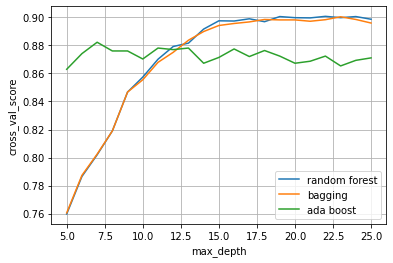

In [30]:

plt.plot(depth, means[0], label='random forest')
plt.plot(depth, means[1], label='bagging')
plt.plot(depth, means[2], label='ada boost')
plt.xlabel('max_depth')
plt.ylabel('cross_val_score')
plt.legend()
plt.grid()
plt.show()

The resuts is agree with answer in previous part.

# Machine Learning practical task 2

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

Load image names and information about iris center and eye corners

In [2]:
def del_emp_str(arr):
    return [t for t in arr if t != '']


# Read and preprocess all needed labels
with open("gi4e_database/labels/image_labels.txt", 'r') as f:
    labels = f.read()
labels = labels.split('\n')
labels = [t.split('\t') for t in labels]
labels = [del_emp_str(label) for label in labels]

# Read all file names
image_names = [os.path.splitext(filename)[0] for filename in os.listdir("gi4e_database/images")][1:]

Iris center and eye corner visualisation

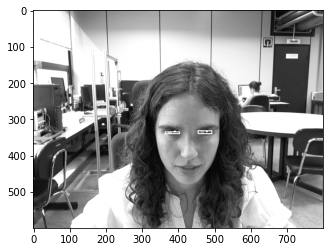

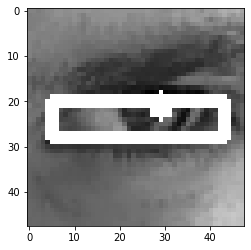

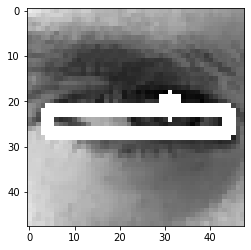

In [3]:
img = cv2.imread("gi4e_database/images/001_02.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_annotation = labels[1]

corner_left_1 = img_annotation[1:3]
corner_left_2 = img_annotation[5:7]
iris_left = img_annotation[3:5]

corner_right_1 = img_annotation[7:9]
corner_right_2 = img_annotation[11:13]
iris_right = img_annotation[9:11]



x1, y1 = map(int, map(float, corner_left_1))
x2, y2 = map(int, map(float, corner_left_2))
x_ir, y_ir = map(int, map(float, iris_left))

center_x = (x1 + x2) // 2
center_y = (y1 + y2) // 2

img = cv2.circle(img, (x_ir, y_ir), 3, (255), -1)
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255), 2)
img_left = img[center_y - 24:center_y + 24, center_x - 24:center_x + 24]



x1, y1 = map(int, map(float, corner_right_1))
x2, y2 = map(int, map(float, corner_right_2))
x_ir, y_ir = map(int, map(float, iris_right))

center_x = (x1 + x2) // 2
center_y = (y1 + y2) // 2

img = cv2.circle(img, (x_ir, y_ir), 3, (255), -1)
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255), 2)
img_right = img[center_y - 24:center_y + 24, center_x - 24:center_x + 24]


plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img_left, cmap='gray')
plt.show()
plt.imshow(img_right, cmap='gray')
plt.show()

Dataset preprocessing

In [8]:
img_arr = [] # Array of images
iris_center = [] # Array of images of iris center
for file_name in image_names:
    # Get file name
    pupil_name, img_name = map(int, file_name.split('_', 2))
    img = cv2.imread(f"gi4e_database/images/{file_name}.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Get iris center and eye corner for image
    img_annotation = labels[(pupil_name-1)*12 + (img_name - 1)]
    
    # Create black image
    img_y = np.zeros(img.shape)
    
    # Calculate left eye corners and iris center
    corner_left_1 = img_annotation[1:3]
    corner_left_2 = img_annotation[5:7]
    iris_left = img_annotation[3:5]
    
    x_ir, y_ir = map(int, map(float, iris_left))
    x1, y1 = map(int, map(float, corner_left_1))
    x2, y2 = map(int, map(float, corner_left_2))
    
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    
    # Make a white circle with left iris center in black imagh
    #img_y = cv2.circle(img_y, (x_ir, y_ir), 1, (255), -1)
    img_y[y_ir, x_ir] = 255
    img_y_left = img_y[center_y - 24:center_y + 24, center_x - 24:center_x + 24]
    img_left = img[center_y - 24:center_y + 24, center_x - 24:center_x + 24]
    # Append image to img_arr
    img_arr.append(img_left / 255)
    # Append iris center image to array
    iris_center.append(img_y_left / 255)
    
    # Same steps as before, but for right eye
    corner_right_1 = img_annotation[7:9]
    corner_right_2 = img_annotation[11:13]
    iris_right = img_annotation[9:11]
    
    x_ir, y_ir = map(int, map(float, iris_right))
    x1, y1 = map(int, map(float, corner_right_1))
    x2, y2 = map(int, map(float, corner_right_2))
    
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    
    #img_y = cv2.circle(img_y, (x_ir, y_ir), 1, (255), -1)
    img_y[y_ir, x_ir] = 255
    img_y_right = img_y[center_y - 24:center_y + 24, center_x - 24:center_x + 24]
    img_right = img[center_y - 24:center_y + 24, center_x - 24:center_x + 24]
    
    img_arr.append(img_right / 255)
    iris_center.append(img_y_right / 255)

Visualize preprocessed data

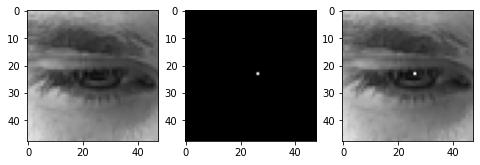

In [9]:
img_arr = np.array(img_arr)
iris_center = np.array(iris_center)

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(img_arr[1], cmap='gray', vmin=0, vmax=1)
fig.add_subplot(1, 3, 2)
plt.imshow(iris_center[1], cmap='gray', vmin=0, vmax=1)
fig.add_subplot(1, 3, 3)
plt.imshow(img_arr[1] + iris_center[1], cmap='gray', vmin=0, vmax=1)
plt.show()

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, BatchNormalization
from sklearn.model_selection import train_test_split
import pydot
import tensorflow as tf
from tensorflow.python.client import device_lib

Reshape from (x, 48, 48) to (x, 48, 48, 1)

In [11]:
img_arr_reshaped = img_arr.reshape(img_arr.shape + (1,))
iris_center_reshaped = iris_center.reshape(iris_center.shape + (1,))

Split dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(img_arr_reshaped, iris_center_reshaped, test_size=0.2, random_state=0)

Create CNN using Keras functional API

In [13]:
img_input = keras.Input(shape=(img_arr_reshaped.shape[1:]), name='img')

activation = 'sigmoid'
a1 = Conv2D(64, 3, activation=activation, padding='same', name='conv_1')(img_input)
x = BatchNormalization(name='batch_1')(a1)
x = MaxPooling2D(2, name='max_pool_1')(x)

x = Conv2D(128, 3, activation=activation, padding='same', name='conv_2')(x)
x = BatchNormalization(name='batch_2')(x)
x = MaxPooling2D(2, name='max_pool_2')(x)

x = Conv2D(256, 3, activation=activation, padding='same', name='conv_3')(x)
a2 = BatchNormalization(name='batch_3')(x)



x = UpSampling2D(4, name='up_1')(a2)
x = Conv2D(64, 3, activation=activation, padding='same', name='conv_4')(x)
x = BatchNormalization(name='batch_4')(x)
x = Concatenate(axis=3, name='concat_1')([a1, x])

x = Conv2D(64, 3, activation=activation, padding='same', name='conv_5')(x)
x = BatchNormalization(name='batch_5')(x)
base_output = Conv2D(1, 3, activation=activation, padding='same', name='base_output')(x)



aux = Conv2D(256, 3, activation=activation, padding='same', name='conv_aux_1')(a2)
aux = UpSampling2D(2, name='up_aux_1')(aux)

aux = Conv2D(128, 3, activation=activation, padding='same', name='conv_aux_2')(aux)

aux = UpSampling2D(2, name='up_aux_2')(aux)
aux = Conv2D(64, 3, activation=activation, padding='same', name='conv_aux_3')(aux)

aux_output = Conv2D(1, 3, activation=activation, padding='same', name='aux_output')(aux)

Create and compile model

In [14]:
net = keras.Model(inputs=[img_input], outputs=[base_output, aux_output], name='iris')
net.compile(loss=['mse', 'mse'], optimizer=keras.optimizers.RMSprop())

Visualize CNN

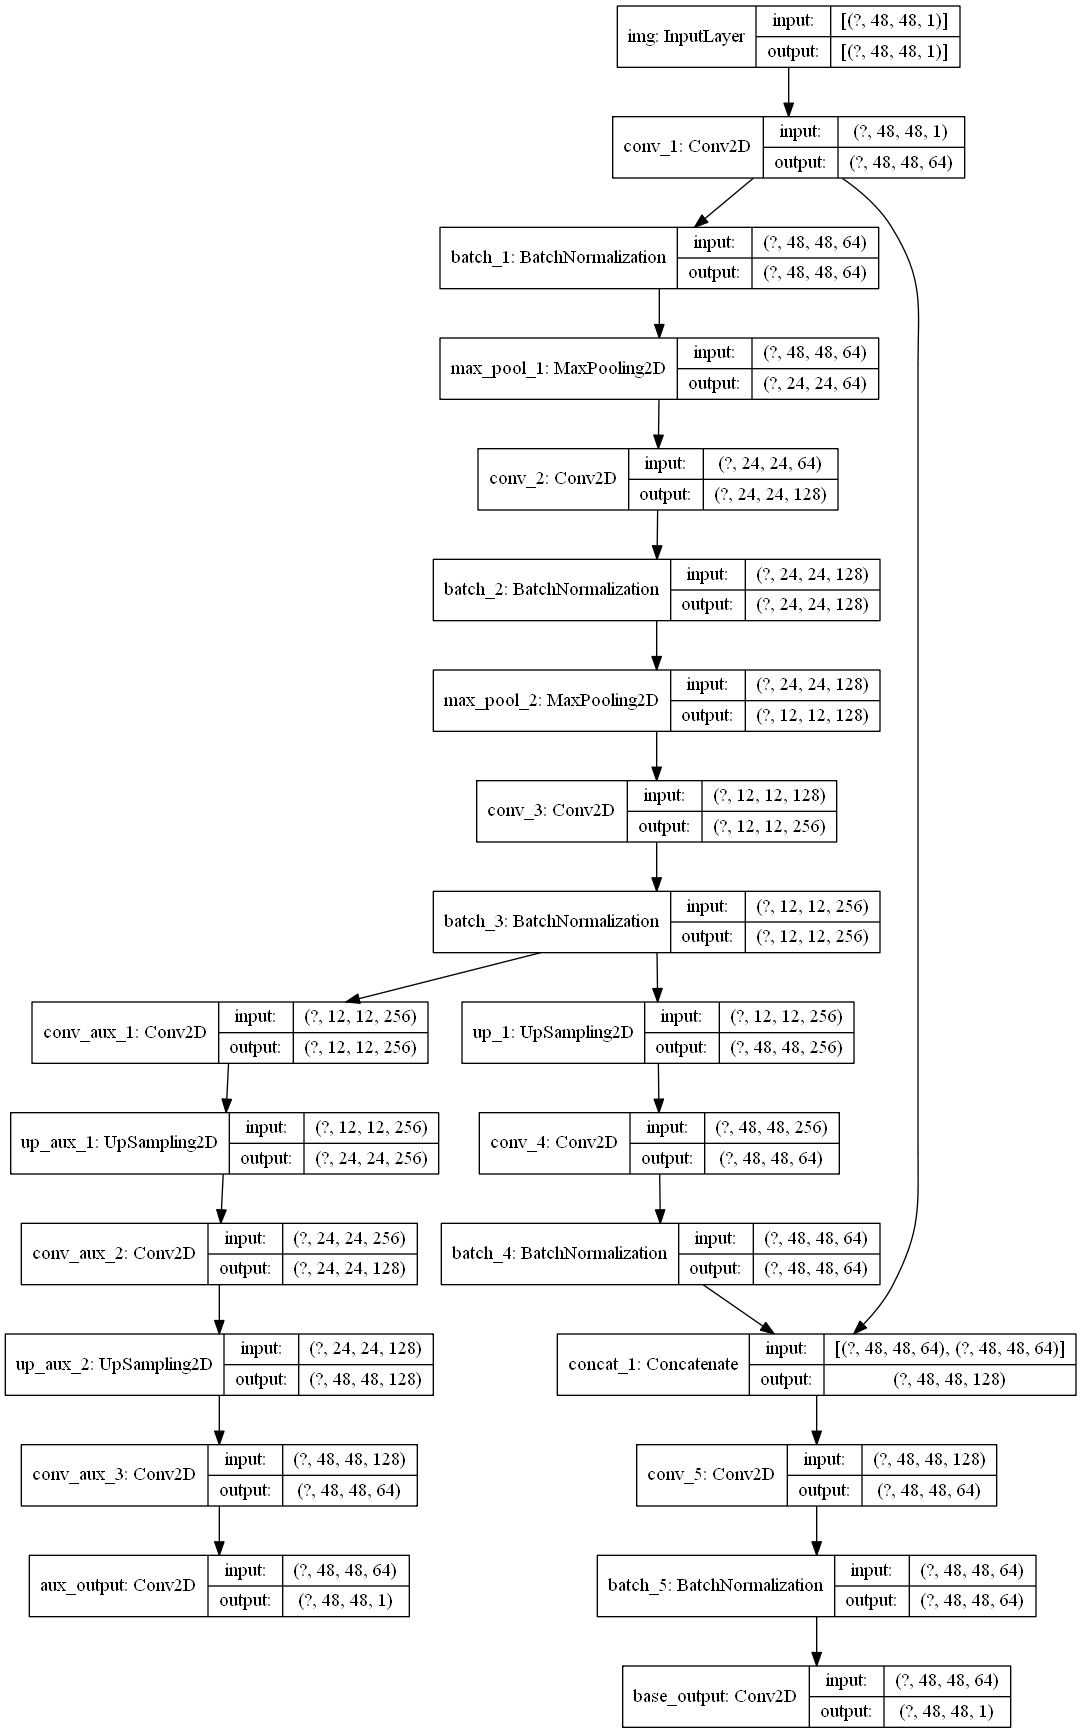

In [15]:
keras.utils.plot_model(net, show_shapes=True)

Fit training data to model

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
net.fit(x=x_train, y={'base_output': y_train, 'aux_output': x_train}, batch_size=32, epochs=30, callbacks = [callback])

Epoch 1/30
62/62 [==============================] - 6s 100ms/step - loss: 0.1185 - base_output_loss: 0.0949 - aux_output_loss: 0.0236
Epoch 2/30
62/62 [==============================] - 5s 85ms/step - loss: 0.0150 - base_output_loss: 0.0053 - aux_output_loss: 0.0097
Epoch 3/30
62/62 [==============================] - 5s 86ms/step - loss: 0.0066 - base_output_loss: 5.7502e-04 - aux_output_loss: 0.0060
Epoch 4/30
62/62 [==============================] - 5s 85ms/step - loss: 0.0054 - base_output_loss: 4.3767e-04 - aux_output_loss: 0.0049
Epoch 5/30
62/62 [==============================] - 5s 86ms/step - loss: 0.0048 - base_output_loss: 4.1309e-04 - aux_output_loss: 0.0044
Epoch 6/30
62/62 [==============================] - 5s 86ms/step - loss: 0.0044 - base_output_loss: 3.9754e-04 - aux_output_loss: 0.0040
Epoch 7/30
62/62 [==============================] - 5s 86ms/step - loss: 0.0036 - base_output_loss: 3.8394e-04 - aux_output_loss: 0.0032
Epoch 8/30
62/62 [==============================

Get prediction

In [35]:
y_pred_center, y_pred_aux = net.predict(x_test)

Seting most bright pixels for value=1

In [36]:
y_pred_center = y_pred_center.reshape(y_pred_center.shape[:-1])
for i in range(len(y_pred_center)):
    _, y_pred_center[i] = cv2.threshold(y_pred_center[i], y_pred_center[i].max()*3/4, 1, cv2.THRESH_BINARY)
y_pred_center = y_pred_center.reshape(y_pred_center.shape + (1,))

Visualize output. From left to right: Original image, iris center, iris center on original image, output of auxilary, predicted iris, predicter iris on original image

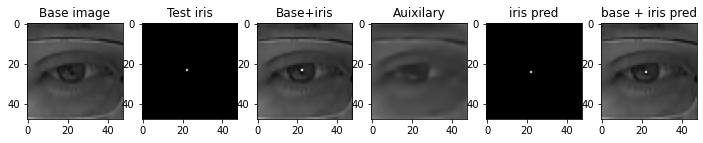

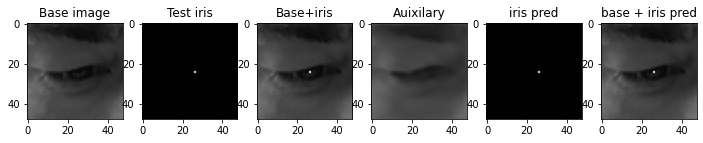

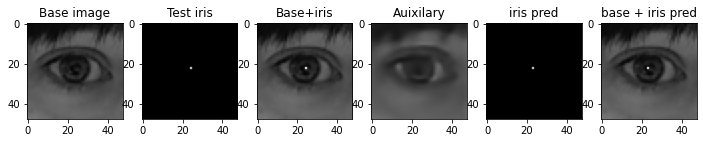

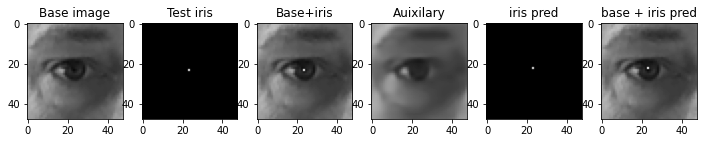

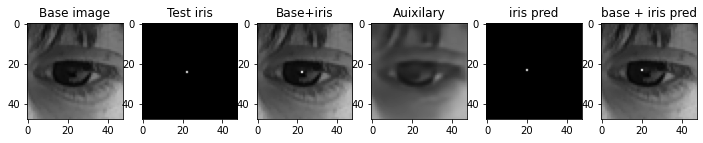

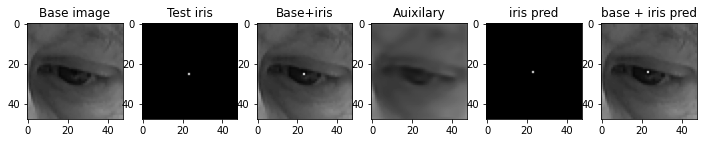

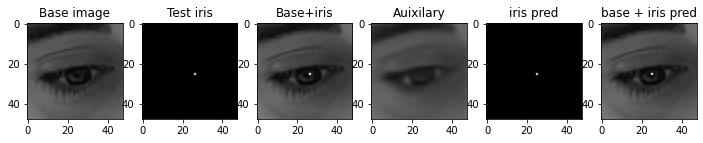

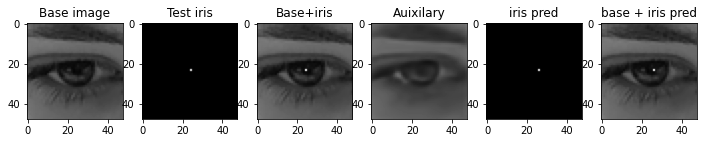

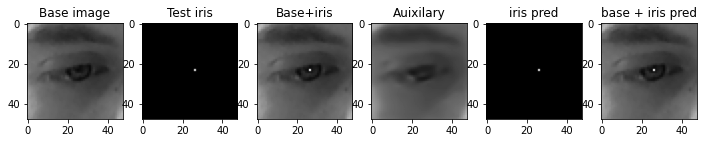

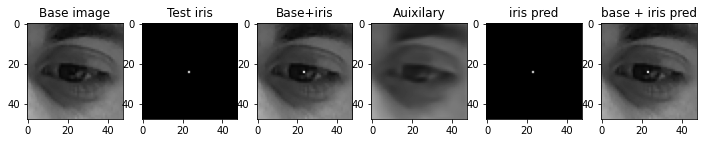

In [37]:
for i in range(10):
    fig = plt.figure(figsize=(12, 12))
    fig.add_subplot(1, 6, 1, title="Base image")
    plt.imshow(x_test[i], cmap='gray', vmin=0, vmax=1)
    fig.add_subplot(1, 6, 2, title="Test iris")
    plt.imshow(y_test[i], cmap='gray')
    fig.add_subplot(1, 6, 3, title="Base+iris")
    plt.imshow(x_test[i]+y_test[i], cmap='gray', vmin=0, vmax=1)
    fig.add_subplot(1, 6, 4, title="Auixilary")
    plt.imshow(y_pred_aux[i], cmap='gray', vmin=0, vmax=1)
    fig.add_subplot(1, 6, 5, title="iris pred")
    plt.imshow(y_pred_center[i], cmap='gray', vmin=0, vmax=1)
    fig.add_subplot(1, 6, 6, title="base + iris pred")
    plt.imshow(x_test[i] + y_pred_center[i], cmap='gray', vmin=0, vmax=1)
plt.show()


Some outputs of different configurations

# Adam:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/Adam.jpg?raw=true">

# Adamax:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/Adamax.jpg?raw=true">

# RMSprop:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/RMSprop.jpg?raw=true">

# SGD:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/SGD.jpg?raw=true">

# Base - mae, aux - mae:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/mae_mae.jpg?raw=true">

# Base - mae, aux - mse:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/mae_mse.jpg?raw=true">

# Base - mse, aux - mae:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/mse_mae.jpg?raw=true">

# Base - mse, aux - mse:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/mse_mse.jpg?raw=true">

# Relu:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/relu.jpg?raw=true">

# Sigmoid:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/sigmoid.jpg?raw=true">

# Tanh:
<img src="https://github.com/Dinislam36/ML_Assignment_2/blob/main/tanh.jpg?raw=true">

# There are some grid search to find best combination

In [136]:
for activator in ['relu', 'sigmoid', 'tanh']:
    for loss in ['mse', 'mae']:
        for optimizer in [keras.optimizers.RMSprop(), keras.optimizers.Adam(), keras.optimizers.Adamax(), keras.optimizers.SGD()]:
            img_input = keras.Input(shape=(img_arr_reshaped.shape[1:]), name='img')

            activation = activator
            a1 = Conv2D(64, 3, activation=activation, padding='same', name='conv_1')(img_input)
            x = BatchNormalization(name='batch_1')(a1)
            x = MaxPooling2D(2, name='max_pool_1')(x)

            x = Conv2D(128, 3, activation=activation, padding='same', name='conv_2')(x)
            x = BatchNormalization(name='batch_2')(x)
            x = MaxPooling2D(2, name='max_pool_2')(x)

            x = Conv2D(256, 3, activation=activation, padding='same', name='conv_3')(x)
            a2 = BatchNormalization(name='batch_3')(x)



            x = UpSampling2D(4, name='up_1')(a2)
            x = Conv2D(64, 3, activation=activation, padding='same', name='conv_4')(x)
            x = BatchNormalization(name='batch_4')(x)
            x = Concatenate(axis=3, name='concat_1')([a1, x])

            x = Conv2D(64, 3, activation=activation, padding='same', name='conv_5')(x)
            x = BatchNormalization(name='batch_5')(x)
            base_output = Conv2D(1, 3, activation=activation, padding='same', name='base_output')(x)



            aux = Conv2D(256, 3, activation=activation, padding='same', name='conv_aux_1')(a2)
            aux = UpSampling2D(2, name='up_aux_1')(aux)

            aux = Conv2D(128, 3, activation=activation, padding='same', name='conv_aux_2')(aux)

            aux = UpSampling2D(2, name='up_aux_2')(aux)
            aux = Conv2D(64, 3, activation=activation, padding='same', name='conv_aux_3')(aux)

            aux_output = Conv2D(1, 3, activation=activation, padding='same', name='aux_output')(aux)
            
            net = keras.Model(inputs=[img_input], outputs=[base_output, aux_output], name='iris')
            net.compile(loss=[loss, loss], optimizer=optimizer)
            
            callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
            history = net.fit(x=x_train, y={'base_output': y_train, 'aux_output': x_train}, verbose=0, batch_size=32, epochs=30, callbacks = [callback])
            print(f"({activator}, {loss}, {optimizer}) - {min(history.history['loss'])}")

(relu, mse, <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x000001BF7722EAF0>) - 0.19109487533569336
(relu, mse, <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001BF7722EE20>) - 0.19172997772693634
(relu, mse, <tensorflow.python.keras.optimizer_v2.adamax.Adamax object at 0x000001BF7722EE50>) - 0.004883628338575363
(relu, mse, <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x000001BF7722EE80>) - 0.006366291549056768
(relu, mae, <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x000001BF7722EEB0>) - 0.3960583508014679
(relu, mae, <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001C0C13C4F40>) - 0.3949931561946869
(relu, mae, <tensorflow.python.keras.optimizer_v2.adamax.Adamax object at 0x000001C0C13DA160>) - 0.39605969190597534
(relu, mae, <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x000001C0C13DAEB0>) - 0.04277607798576355
(sigmoid, mse, <tensorflow.python.keras.optimizer_v2.r

# We got following results:

```
(relu, mse, RMSprop) - 0.1910
(relu, mse, Adam) - 0.1917
(relu, mse, Adamax) - 0.0048
(relu, mse, SGD) - 0.0063
(relu, mae, RMSprop) - 0.3960
(relu, mae, Adam) - 0.3949
(relu, mae, Adamax) - 0.3960
(relu, mae, SGD) - 0.0427
(sigmoid, mse, RMSprop) - 0.0016
(sigmoid, mse, Adam) - 0.0028
(sigmoid, mse, Adamax) - 0.0022
(sigmoid, mse, SGD) - 0.0111
(sigmoid, mae, RMSprop) - 0.0295
(sigmoid, mae, Adam) - 0.0308
(sigmoid, mae, Adamax) - 0.0408
(sigmoid, mae, SGD) - 0.1666
(tanh, mse, RMSprop) - 0.0276
(tanh, mse, Adam) - 0.0047
(tanh, mse, Adamax) - 0.0064
(tanh, mse, SGD) - 0.0200
(tanh, mae, RMSprop) - 0.1765
(tanh, mae, Adam) - 0.0884
(tanh, mae, Adamax) - 0.0707
(tanh, mae, SGD) - 0.1170```

As we can see, the best combination is (sigmoid, mse, RMSprop) with loss=0.0016